## Summary

Model a Poisson Process using `PoissonProcess`, a user-defined class.

## Dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import poissonprocesses as pp
from laughingrook import rvhelpers as rvh

## Main

In [2]:
%precision 4
sns.set_theme()

### Initialise the object

> *In an investigation into computer reliability, a particular unit failed on average every 652 seconds.*
*Assuming that the incidence of failures may be adequately modelled by a Poisson process, (simulate a series of computer failures over ten minutes.)*

Initialise *comp_failures*, `PoissonProcess`, a Poisson process model for the occurrence of computer failures that occur at random over time.

:::{.callout-note}
We set the base rate to 1 hour.
:::

In [3]:
comp_failures = pp.Events(1/652 * 3600)  # per hour

### Describe the model

In [4]:
# Print the models
print(comp_failures)

N(t) ~ Poisson(5.521), T ~ M(5.521)


In [5]:
# describe N(t)
rvh.describe(comp_failures.n_time())

mean    5.521472
var     5.521472
min            0
lq           4.0
med          5.0
uq           7.0
max          inf
Name: description, dtype: object

In [6]:
# describe T
rvh.describe(comp_failures.waiting_time())

mean    0.181111
var     0.032801
min          0.0
lq      0.052102
med     0.125537
uq      0.251073
max          inf
Name: description, dtype: object

### Plot the models

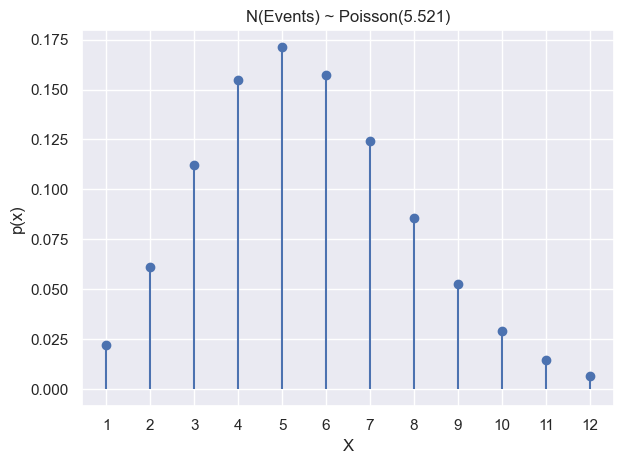

In [7]:
(comp_failures
 .plot_n_time()
)

Plot the modelled waiting time between successive computer failures,

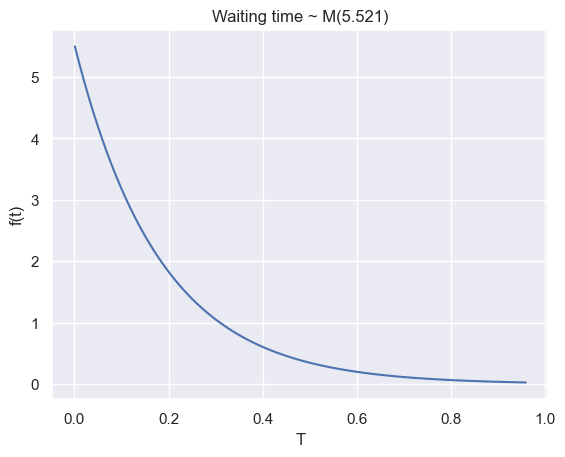

In [8]:
comp_failures.plot_waiting_time()

### Use the model

#### Number of events

In [9]:
# P(N(1) = 4)
(comp_failures
 .n_time()
 .pmf(4)
)

0.1549

In [10]:
# Expected number of events during 1 work dat
(comp_failures
 .rescale(8)  # rescaled to 8 hours == 1 work day
 .n_time()
 .mean()
)

44.1718

In [18]:
# Describe 1 work days
rvh.describe(
        comp_failures
        .rescale(8)
        .n_time()
)

mean    44.171779
var     44.171779
min             0
lq           40.0
med          44.0
uq           49.0
max           inf
Name: description, dtype: object

#### Time to next event

In [13]:
# Probability less than 10 minutes to the next failure
(comp_failures
 .waiting_time()
 .cdf(1/6)
)

0.6016

In [14]:
# Probability greater than 15 minutes to the next failure
(comp_failures
 .waiting_time()
 .sf(1/4)
)

0.2515

In [15]:
# describe the waiting time values
rvh.describe(comp_failures.waiting_time())

mean    0.181111
var     0.032801
min          0.0
lq      0.052102
med     0.125537
uq      0.251073
max          inf
Name: description, dtype: object

### Simulation

:::{.callout-note}
We don't plan to add a simulation functionality to `PoissonPlot`.
This script could be modifed for other models.
:::

Simulate a single work day, taken to be 8 hours.

What is the 0.99-quantile of the number of events on a single work day, according to the model?

In [16]:
(comp_failures
 .rescale(8)  # rescaled to 8 hours == 1 work day
 .n_time()
 .ppf(0.99)
)

60.0000

Given the 0.99-quantile of the number of events during a work day is approximately 60, let's simulate 100 values and filter the results.

In [17]:
start_dt = pd.Timestamp('today').normalize() + pd.Timedelta('8 hours')
(pd.DataFrame()
 .assign(value=comp_failures.waiting_time().rvs(100))
 .assign(cumsum=lambda df: df['value'].cumsum())
 .assign(timestamp=lambda df: pd.to_timedelta(df['cumsum'], unit='hours'))
 .query('cumsum <= 8')  # discard values that are 8 hours after the start
 .get(['timestamp'])    # discard the other columns
 .apply(lambda ser: start_dt + ser)  # adjust the timestamp
).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  44 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 704.0 bytes
